# Prompt1&2
# Which player underperformed the most this season and needs improvement?
# Which player shows the most potential for growth next season?


In [11]:
import pandas as pd

# Load and clean dataset
df = pd.read_csv("su_mens_soccer_2024.csv")
df.columns = df.columns.str.strip()

# Filter out players with less than 180 minutes (2 games) for meaningful analysis
df_main = df[df["min"] >= 180].copy()

# Compute goals, assists, and total contribution per 90 minutes
df_main["goals_per_90"] = df_main["g"] / (df_main["min"] / 90)
df_main["assists_per_90"] = df_main["a"] / (df_main["min"] / 90)
df_main["total_contribution_per_90"] = df_main["goals_per_90"] + df_main["assists_per_90"]

# Underperformer Analysis
underperformers = df_main.sort_values("total_contribution_per_90", ascending=True)

print("\nPlayer(s) who underperformed the most (min >= 180 mins):")
print(underperformers[["player", "min", "g", "a", "total_contribution_per_90"]].head(3))

# High Potential Analysis
# Filter for mid-playtime players (180–450 minutes)
df_potential = df[(df["min"] >= 180) & (df["min"] <= 450)].copy()

df_potential["goals_per_90"] = df_potential["g"] / (df_potential["min"] / 90)
df_potential["assists_per_90"] = df_potential["a"] / (df_potential["min"] / 90)
df_potential["total_contribution_per_90"] = df_potential["goals_per_90"] + df_potential["assists_per_90"]

high_potential = df_potential.sort_values("total_contribution_per_90", ascending=False)

print("\nPlayer(s) with most potential for growth (180–450 mins played):")
print(high_potential[["player", "min", "g", "a", "total_contribution_per_90"]].head(3))


Player(s) who underperformed the most (min >= 180 mins):
           player   min  g  a  total_contribution_per_90
21     hut, tomas  1460  0  0                        0.0
18  bell, dominic   479  0  0                        0.0
17   bawa, ernest   466  0  0                        0.0

Player(s) with most potential for growth (180–450 mins played):
              player  min  g  a  total_contribution_per_90
15  zambrano, carlos  424  1  0                   0.212264


# Prompt 3 & 4
# Which player was the most efficient in front of goal, and how might that impact next season’s tactics?
# If you were to build next season’s attack around one underutilized player, who would it be and why?

In [12]:
import pandas as pd

df = pd.read_csv("su_mens_soccer_2024.csv")
df.columns = df.columns.str.lower().str.strip()

# Filter only players with shots taken to avoid NaNs
df = df[df["sh"] > 0]

# Calculate accuracy and conversion
df["sog_percent"] = df["sog"] / df["sh"]
df["goal_conversion_rate"] = df["g"] / df["sh"]

# Combine metrics to get an overall efficiency score
df["efficiency_score"] = (df["sog_percent"] + df["goal_conversion_rate"]) / 2

# Sort to find most efficient
efficient_players = df.sort_values(by="efficiency_score", ascending=False)[["player", "sh", "g", "sog", "goal_conversion_rate", "sog_percent", "efficiency_score"]].head(5)

print("Most Efficient Finishers (Top 5):")
print(efficient_players.to_string(index=False))

Most Efficient Finishers (Top 5):
           player  sh  g  sog  goal_conversion_rate  sog_percent  efficiency_score
   gradus, michal   1  1    1              1.000000     1.000000          1.000000
fortier, kristjan   6  2    4              0.333333     0.666667          0.500000
    bell, dominic   1  0    1              0.000000     1.000000          0.500000
 threadgold, gabe  18  4   12              0.222222     0.666667          0.444444
  rosenblatt, ben   6  1    4              0.166667     0.666667          0.416667


In [13]:
# Recalculate contribution per 90
df["contribution_per_90"] = (df["g"] + df["a"]) / (df["min"] / 90)

# Median and thresholds
median_min = df["min"].median()
low_minutes_threshold = 0.4 * median_min

# Filter underutilized high-potential players
underutilized = df[(df["min"] < low_minutes_threshold) & (df["contribution_per_90"] > df["contribution_per_90"].quantile(0.75))]

# Sort by impact per 90
underutilized_sorted = underutilized.sort_values(by="contribution_per_90", ascending=False)[["player", "min", "g", "a", "contribution_per_90"]]

print("Underutilized High-Impact Players:")
print(underutilized_sorted.to_string(index=False))

Underutilized High-Impact Players:
        player  min  g  a  contribution_per_90
gradus, michal   19  1  0             4.736842
leibold, giona  178  0  1             0.505618


In [7]:
!python3 -m pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


# Prompt 5 & 6
# What went wrong in the previous season?
# What can we improve in the next season?

/var/folders/86/22hj39912sg_5lvcpgympkq00000gn/T/ipykernel_78172/410077598.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_impact, x='contributions_per_90', y='player_name', palette='Reds_r', ax=axes[0, 0])
/var/folders/86/22hj39912sg_5lvcpgympkq00000gn/T/ipykernel_78172/410077598.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_conversion, x='goals_per_shot', y='player_name', palette='Oranges_r', ax=axes[0, 1])
/var/folders/86/22hj39912sg_5lvcpgympkq00000gn/T/ipykernel_78172/410077598.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same

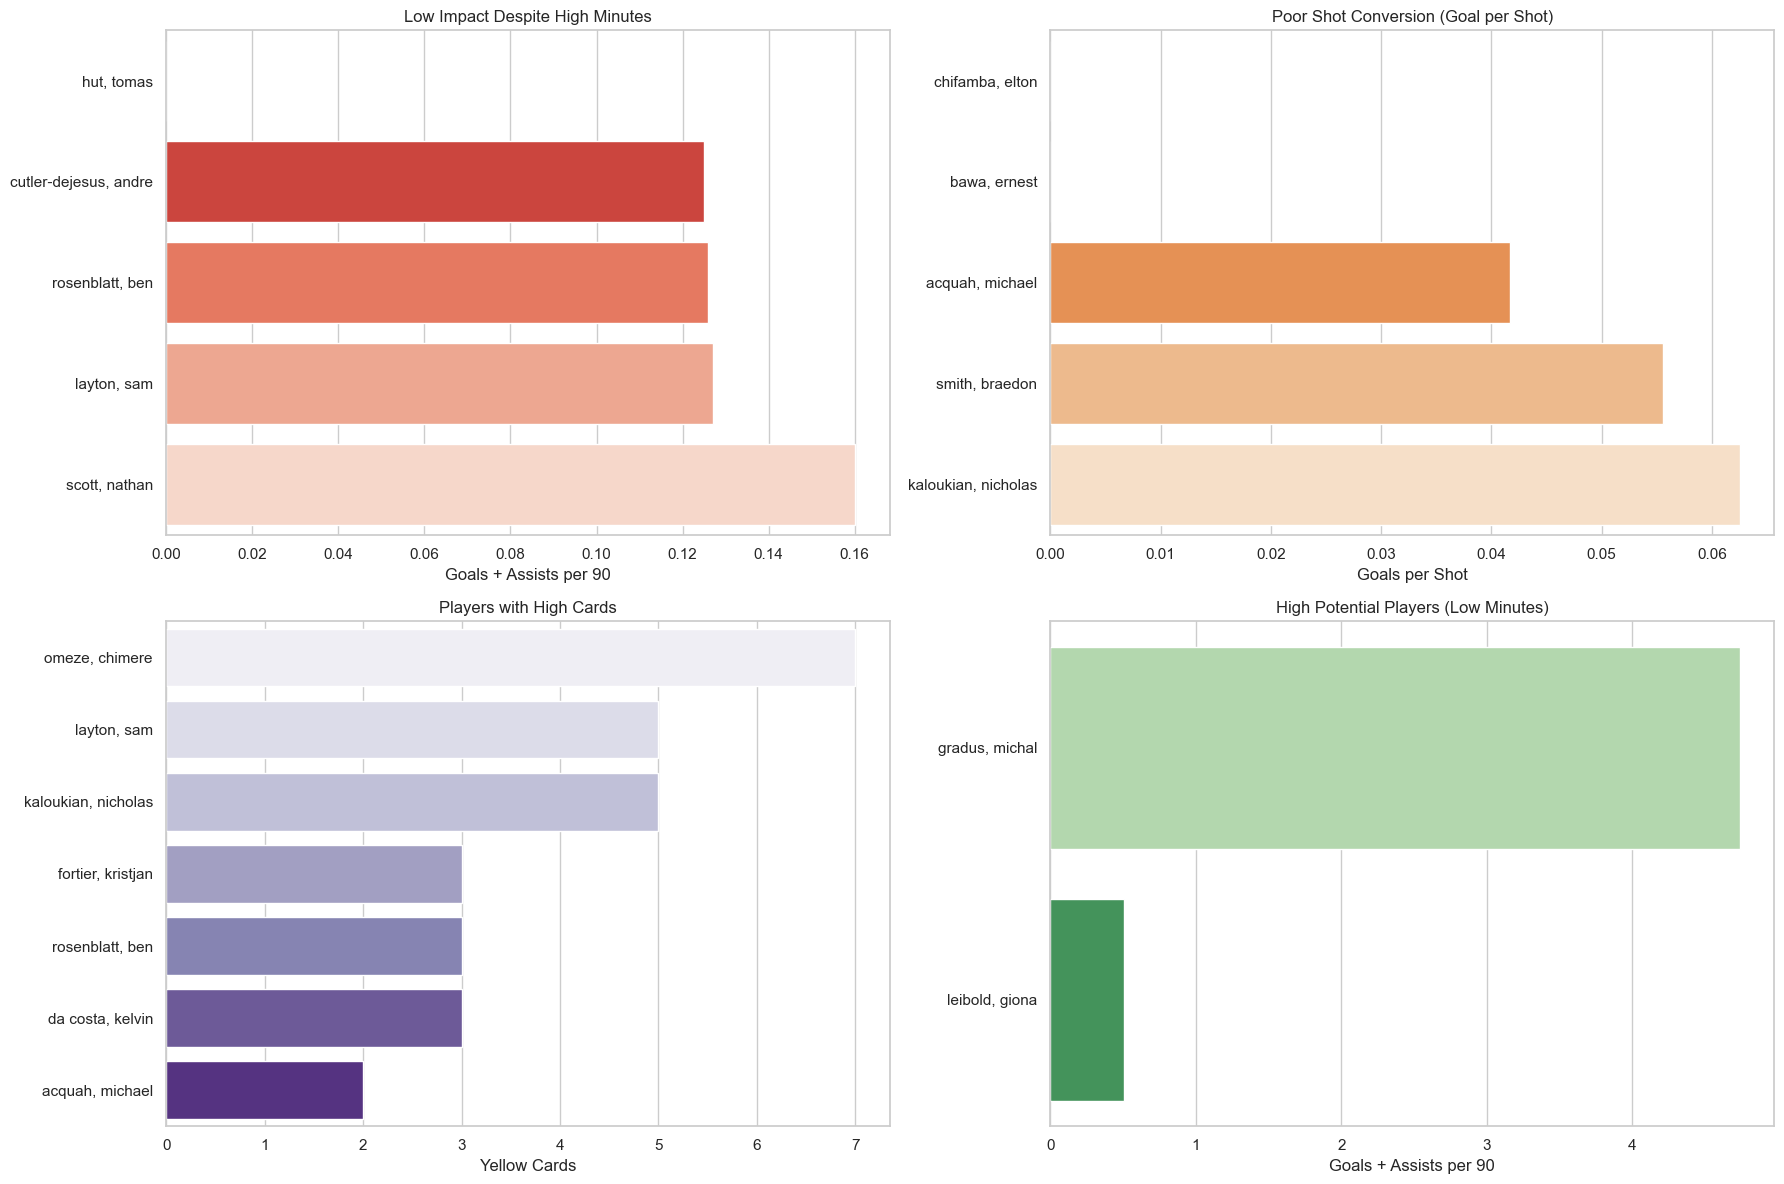

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load & clean data
df = pd.read_csv("su_mens_soccer_2024.csv")
df.columns = df.columns.str.strip().str.lower()

# Rename columns
df = df.rename(columns={
    'g': 'goals',
    'a': 'assists',
    'sh': 'shots',
    'sh%': 'shot_pct',
    'sog': 'shots_on_goal',
    'sog%': 'sog_pct',
    'min': 'minutes',
    'yc': 'yellow_cards',
    'rc': 'red_cards',
    'player': 'player_name'
})

# Derived metrics
df['contributions'] = df['goals'] + df['assists']
df['contributions_per_90'] = df['contributions'] / (df['minutes'] / 90)
df['goals_per_shot'] = df['goals'] / df['shots'].replace(0, 1)  # Avoid div by 0

# 1. Who had high minutes but low contributions?
low_impact = df[df['minutes'] > 600].sort_values('contributions_per_90').head(5)

# 2. Shot conversion problem?
low_conversion = df[df['shots'] > 10].sort_values('goals_per_shot').head(5)

# 3. Disciplinary issues
discipline_issues = df[(df['yellow_cards'] + df['red_cards']) > 2].sort_values(by=['yellow_cards', 'red_cards'], ascending=False)

# 4. Underutilized high performers
high_potential = df[(df['minutes'] < 300) & (df['contributions_per_90'] > 0.5)].sort_values('contributions_per_90', ascending=False)

# --- Visualization ---
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Low impact despite high minutes
sns.barplot(data=low_impact, x='contributions_per_90', y='player_name', palette='Reds_r', ax=axes[0, 0])
axes[0, 0].set_title("Low Impact Despite High Minutes")
axes[0, 0].set_xlabel("Goals + Assists per 90")
axes[0, 0].set_ylabel("")

# Poor shot conversion
sns.barplot(data=low_conversion, x='goals_per_shot', y='player_name', palette='Oranges_r', ax=axes[0, 1])
axes[0, 1].set_title("Poor Shot Conversion (Goal per Shot)")
axes[0, 1].set_xlabel("Goals per Shot")
axes[0, 1].set_ylabel("")

# Disciplinary issues
sns.barplot(data=discipline_issues, x='yellow_cards', y='player_name', palette='Purples', ax=axes[1, 0])
axes[1, 0].set_title("Players with High Cards")
axes[1, 0].set_xlabel("Yellow Cards")
axes[1, 0].set_ylabel("")

# Underused but high potential
sns.barplot(data=high_potential, x='contributions_per_90', y='player_name', palette='Greens', ax=axes[1, 1])
axes[1, 1].set_title("High Potential Players (Low Minutes)")
axes[1, 1].set_xlabel("Goals + Assists per 90")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

# Top Captain Choice

In [9]:
# Discipline Score: yellow + 2*red
df["discipline_score"] = df["yc"] + 2 * df["rc"]

# Leadership scoring
df["leadership_score"] = (
    0.4 * df["min"] +
    0.3 * df["gs"] +
    0.2 * df["contributions_per_90"] -
    0.1 * df["discipline_score"]
)

top_captains = df[["player", "leadership_score"]].sort_values("leadership_score", ascending=False).head(5)

print("Top Captain Candidates:")
print(top_captains)

Top Captain Candidates:
                   player  leadership_score
21             hut, tomas        589.100000
10  cutler-dejesus, andre        580.725017
11            layton, sam        570.525424
2          omeze, chimere        526.155172
0        threadgold, gabe        512.299369
